In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math as math

In [2]:
N = 100000

def caminhada(N):
    passos1d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    passos2d = np.random.uniform(low = -0.5, high = 0.5, size = (N))
    return passos1d, passos2d
def somaAcumulada(N, passos):
    soma = []
    soma = soma + [passos[0]]
    for i in range(1, N):
        soma += [soma[-1] + passos[i]]
    return soma
        

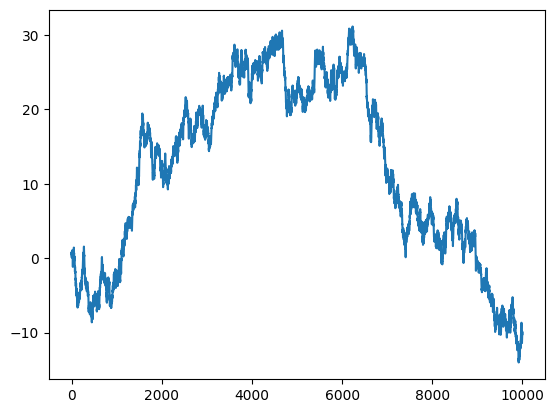

In [3]:
def grafico1a(N):
    passos1, passos2 = caminhada(N)
    soma = somaAcumulada(N, passos1)
    t = np.arange(N)

    plt.plot(t, soma)
    plt.show()
grafico1a(10000)

# 1 - a

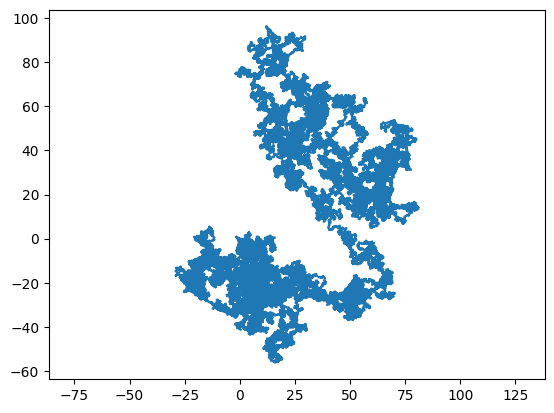

85.29716621307666

In [5]:
def grafico1b(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)
    distancia = (math.sqrt( (X[-1]-X[0])**2 + (Y[-1] - Y[0])**2 ))
    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

    return distancia
grafico1b(100000)

# 1 - b

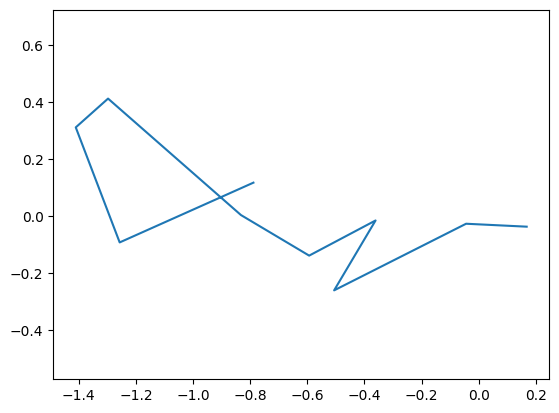

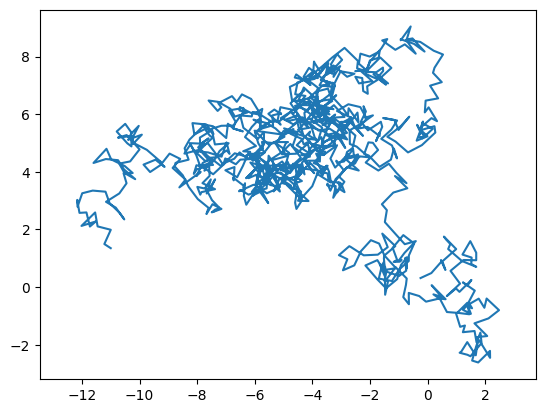

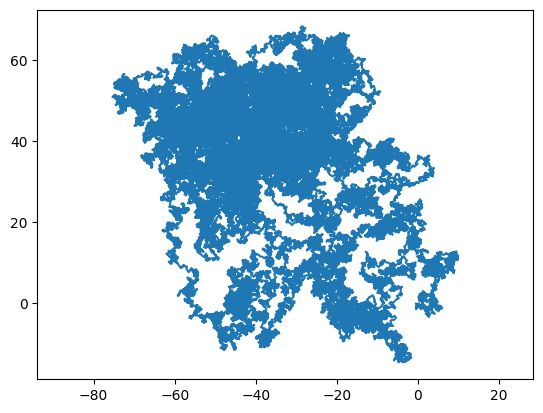

Aumento da distancia de 10 para 1000 é de 11.147537348865676x mais
Aumento da distancia de 1000 para 100000 é de 8.397654506075284x mais


In [9]:
dist10 = grafico1b(10)
dist1000 = grafico1b(1000)
dist100000 = grafico1b(100000)

print(f'Aumento da distancia de 10 para 1000 é de {dist1000/dist10}x mais')
print(f'Aumento da distancia de 1000 para 100000 é de {dist100000/dist1000}x mais')

Consideramos que há um almento por *cerca* de 10x.

# 2

In [11]:
def coordenadaFinalDaCaminhada(N):
    passos1, passos2 = caminhada(N)
    X = somaAcumulada(N, passos1)
    Y = somaAcumulada(N, passos2)

    return X[-1], Y[-1]

def distribuiçãoCoordenadasFinais(numCaminhadas, numPassosPorCaminhada):
    X = np.zeros(numCaminhadas)
    Y = np.zeros(numCaminhadas)

    for i in range(numCaminhadas):
        X[i], Y[i] = coordenadaFinalDaCaminhada(numPassosPorCaminhada)
        
    plt.axis('equal')
    plt.plot(X, Y)
    plt.show()

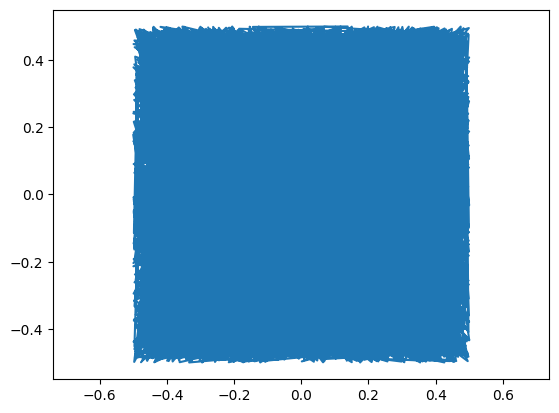

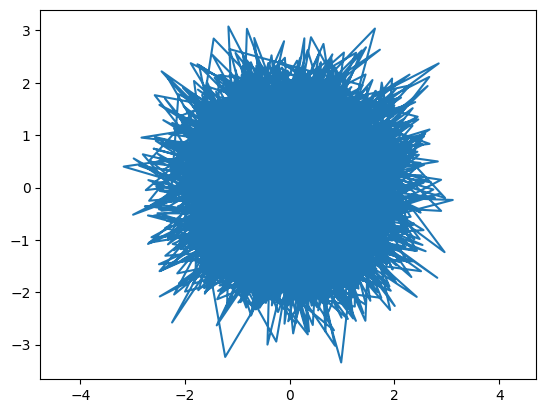

In [15]:
distribuiçãoCoordenadasFinais(10_000, 1)
distribuiçãoCoordenadasFinais(10_000, 10)

# c